# Experiment No. 7

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Working with Perfectly Linear Dataset


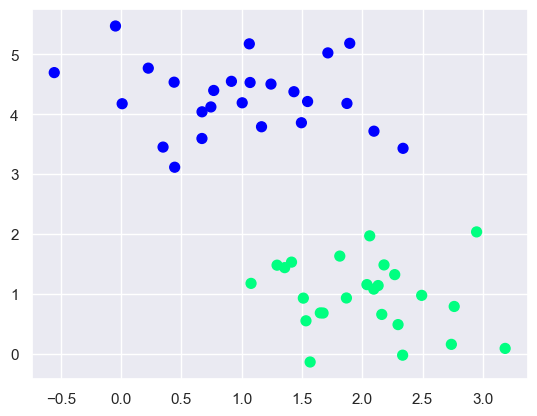

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

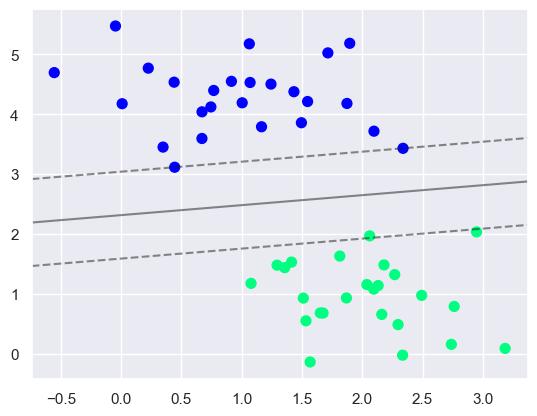

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

# Almost Linearly Separable Dataset

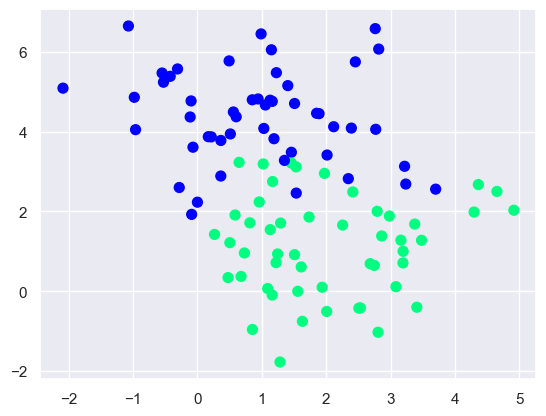

In [7]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

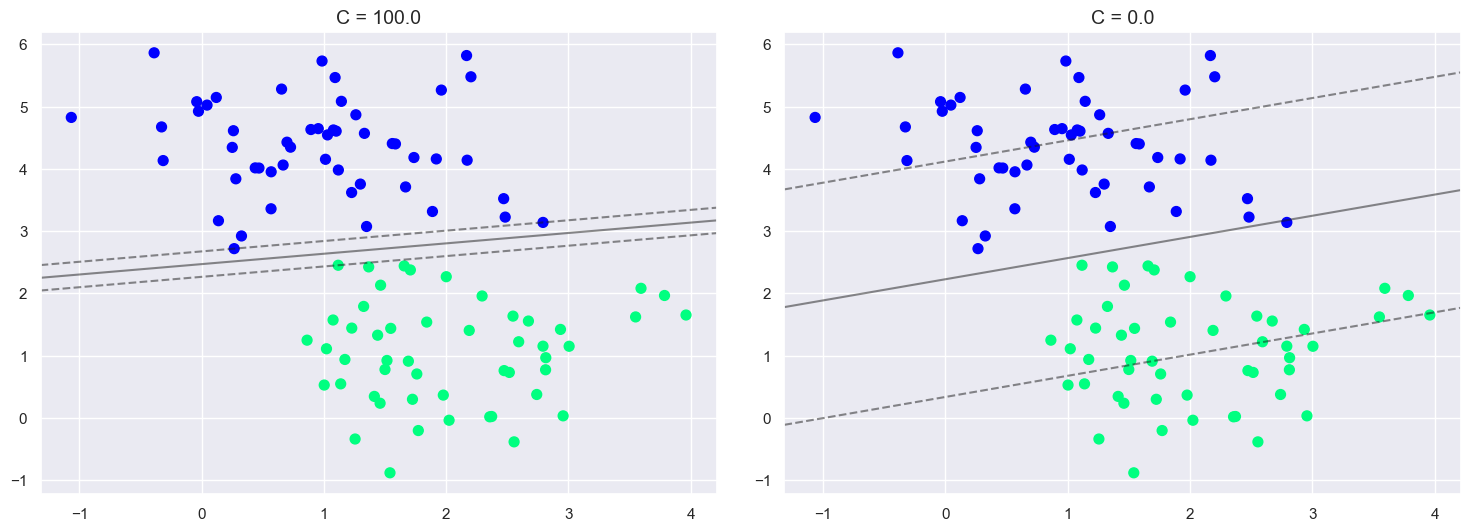

In [8]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Task 2 :- Mushrooms dataset 


In [9]:
data = pd.read_csv('mushrooms.csv')

In [10]:
data.shape

(8124, 23)

In [11]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [12]:
X = data.drop(columns='class')

In [13]:
y = data['class']

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [15]:
df2 = pd.DataFrame() 
df2['cap-shape'] = encoder.fit_transform(data['cap-shape'])
df2['cap-surface'] = encoder.fit_transform(data['cap-surface'])
df2['cap-color'] = encoder.fit_transform(data['cap-color'])
df2['bruises'] = encoder.fit_transform(data['bruises'])
df2['odor'] = encoder.fit_transform(data['odor'])
df2['gill-attachment'] = encoder.fit_transform(data['gill-attachment'])
df2['gill-spacing'] = encoder.fit_transform(data['gill-spacing'])
df2['gill-size'] = encoder.fit_transform(data['gill-size'])
df2['gill-color'] = encoder.fit_transform(data['gill-color'])
df2['stalk-shape'] = encoder.fit_transform(data['stalk-shape'])
df2['stalk-root'] = encoder.fit_transform(data['stalk-root'])
df2['stalk-surface-above-ring'] = encoder.fit_transform(data['stalk-surface-above-ring'])
df2['stalk-surface-below-ring'] = encoder.fit_transform(data['stalk-surface-below-ring'])
df2['stalk-color-above-ring'] = encoder.fit_transform(data['stalk-color-above-ring'])
df2['stalk-color-below-ring'] = encoder.fit_transform(data['stalk-color-below-ring'])
df2['veil-type'] = encoder.fit_transform(data['veil-type'])
df2['veil-color'] = encoder.fit_transform(data['veil-color'])
df2['ring-number'] = encoder.fit_transform(data['ring-number'])
df2['ring-type'] = encoder.fit_transform(data['ring-type'])
df2['spore-print-color'] = encoder.fit_transform(data['spore-print-color'])
df2['population'] = encoder.fit_transform(data['population'])
df2['habitat'] = encoder.fit_transform(data['habitat'])
df2['class'] = data['class']

In [16]:
X = df2.drop(columns='class')
y = df2['class']

In [17]:
x_train , x_test, y_train,y_test = train_test_split(X,y,random_state = 20)

In [18]:
from sklearn.svm import SVC

In [19]:
svc= SVC()
svc.fit(x_train,y_train)

SVC()

In [20]:
svc.score(x_test,y_test)

0.9911373707533235

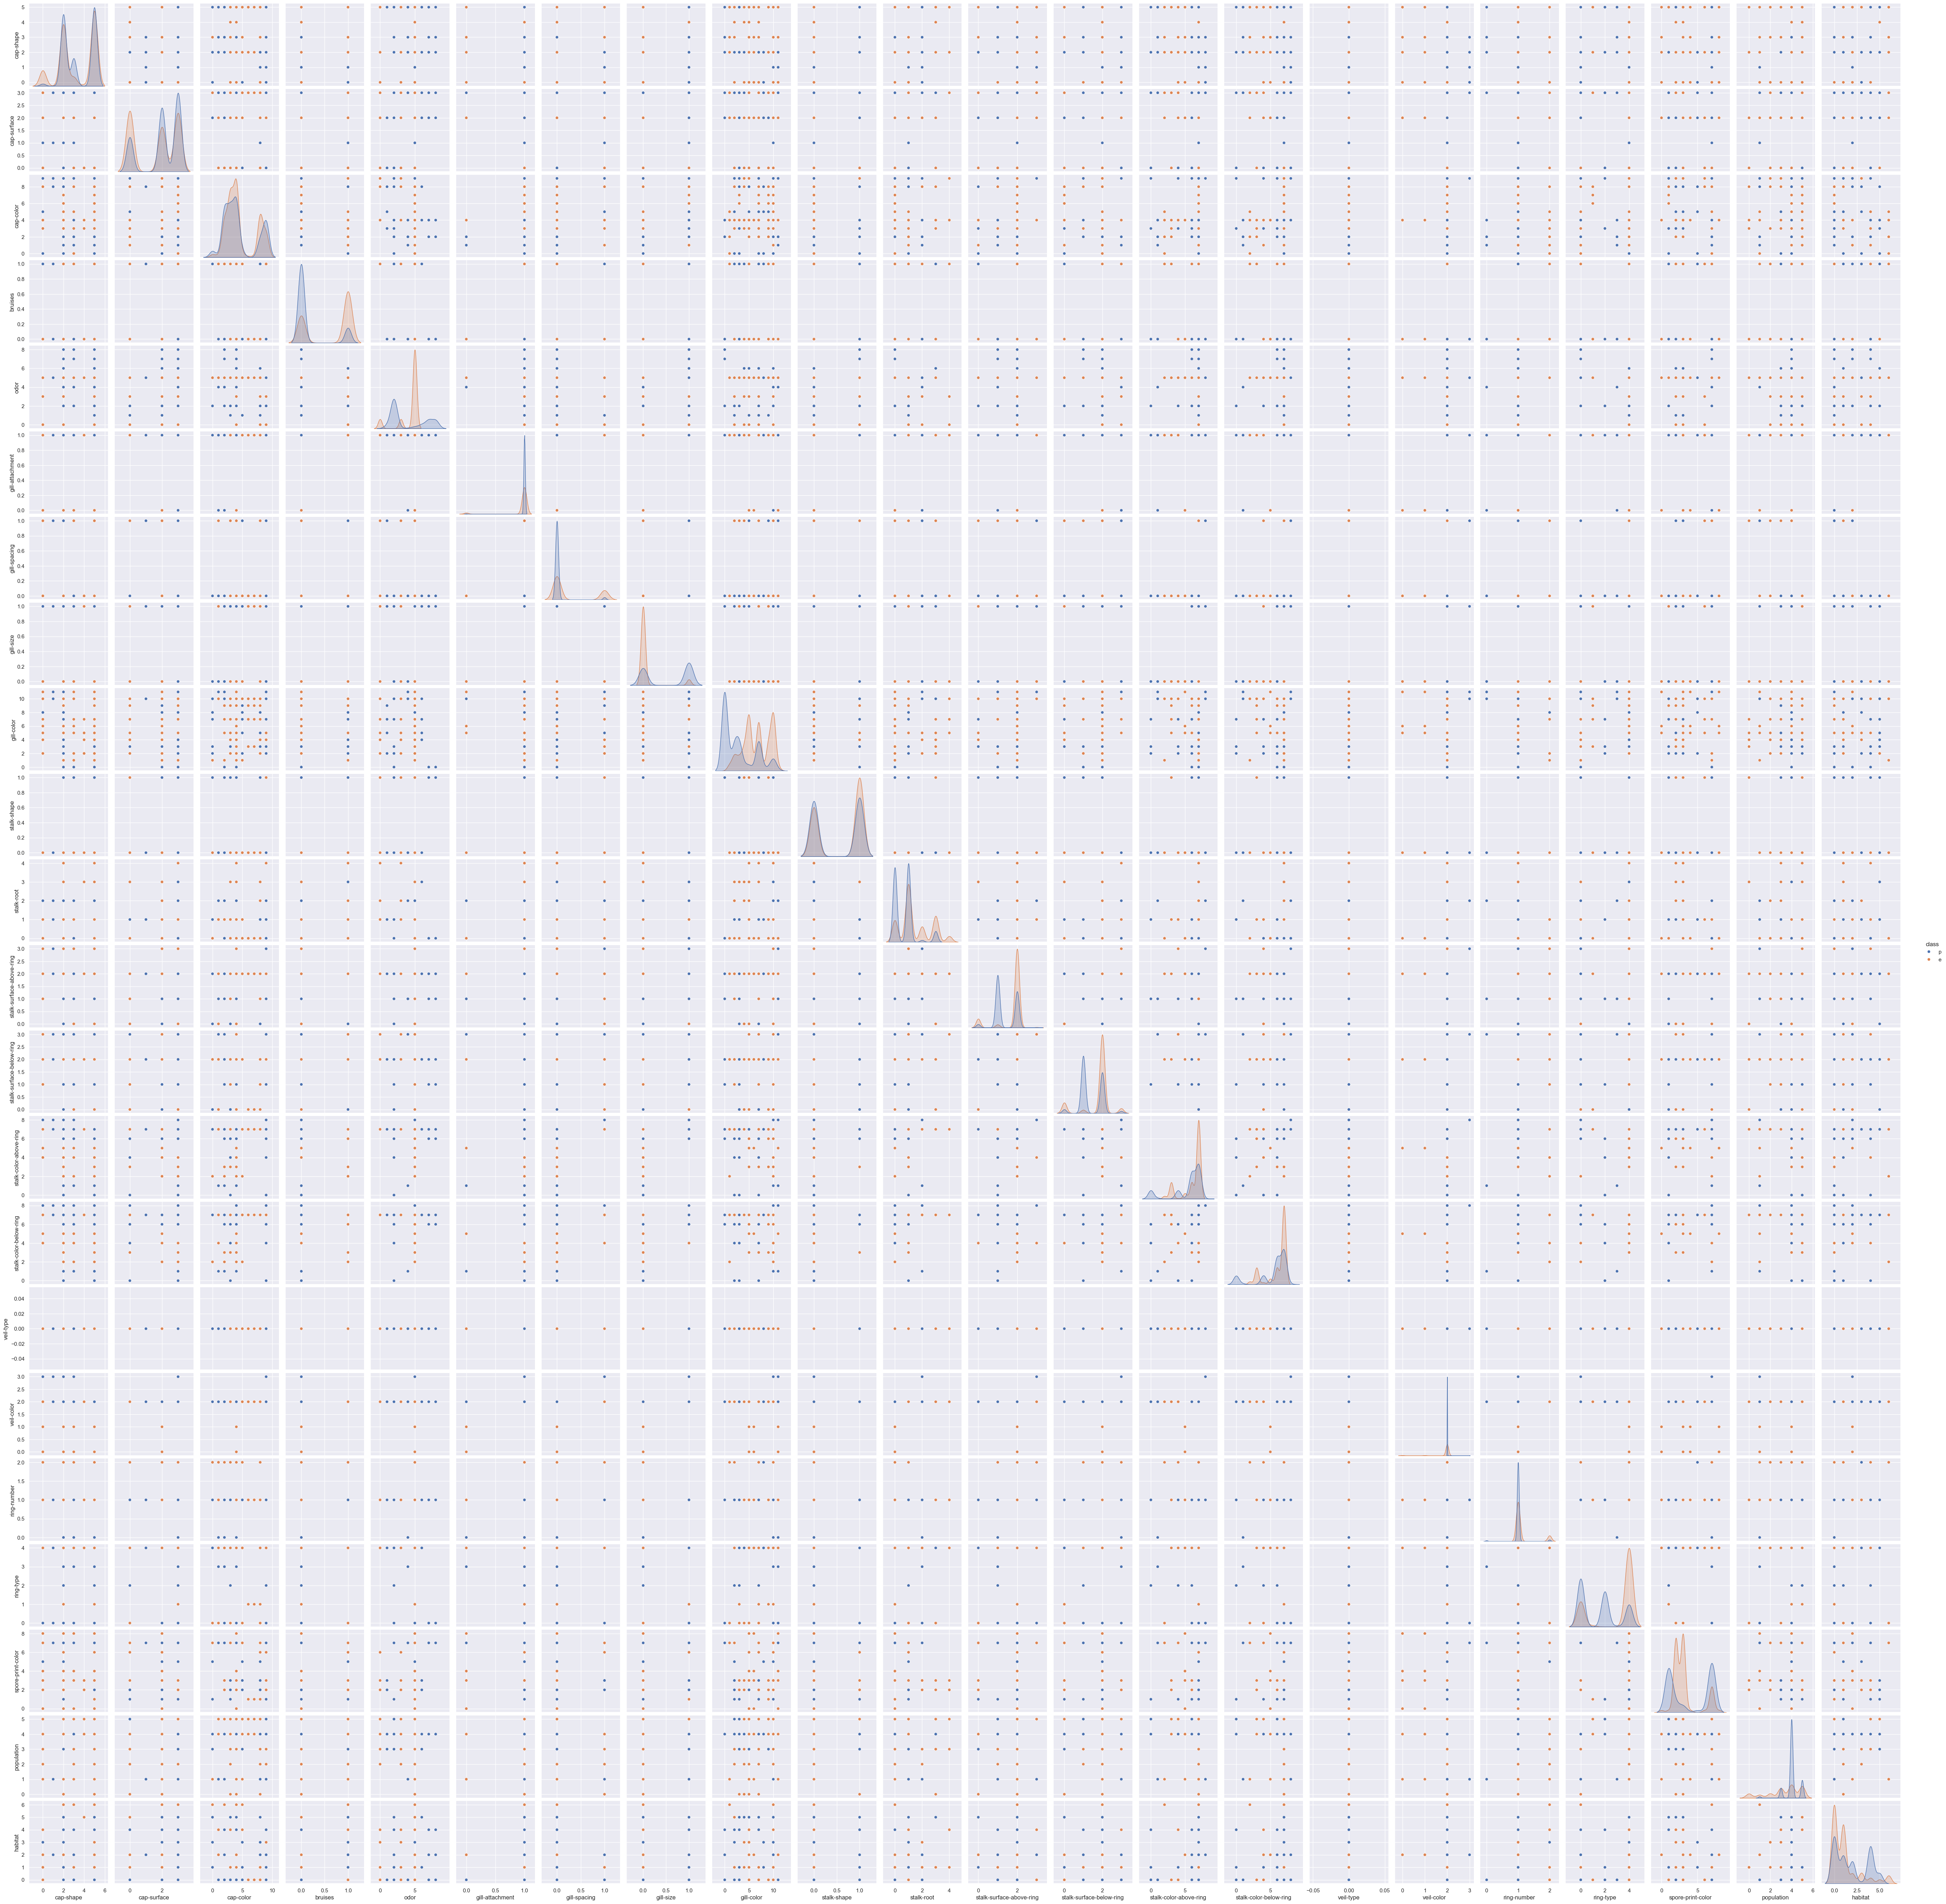

In [21]:
sns.pairplot(df2, hue='class')

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

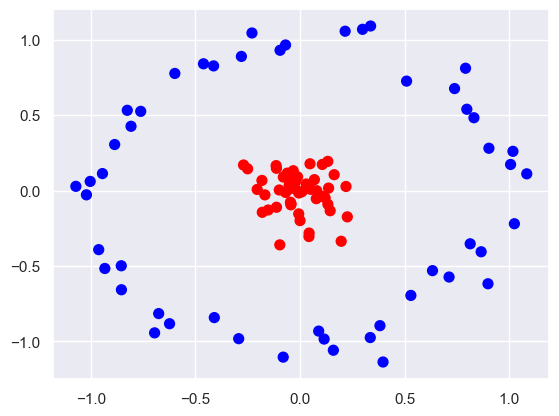

In [22]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [24]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.35

In [26]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_12992\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


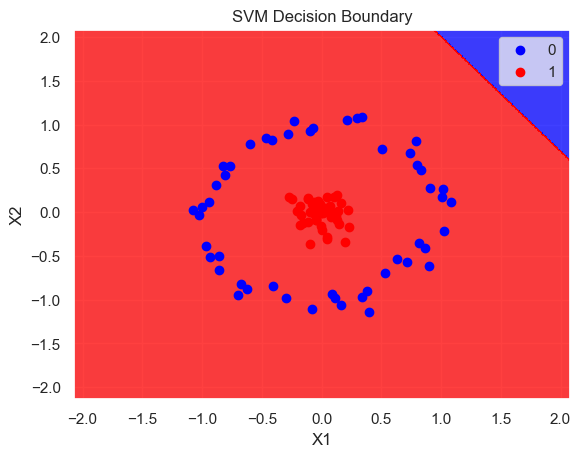

In [27]:
plot_decision_boundary(X, y, classifier)

In [29]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)


<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

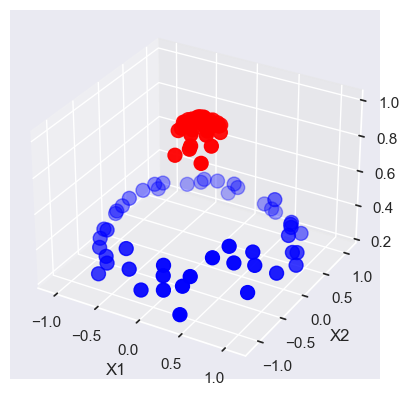

In [30]:
plot_3d_plot(X,y)

In [31]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_12992\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


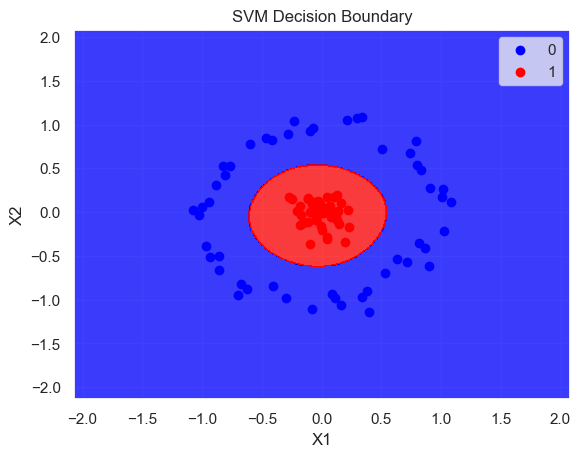

In [33]:
plot_decision_boundary(X, y, rbf_classifier)

In [34]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_12992\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


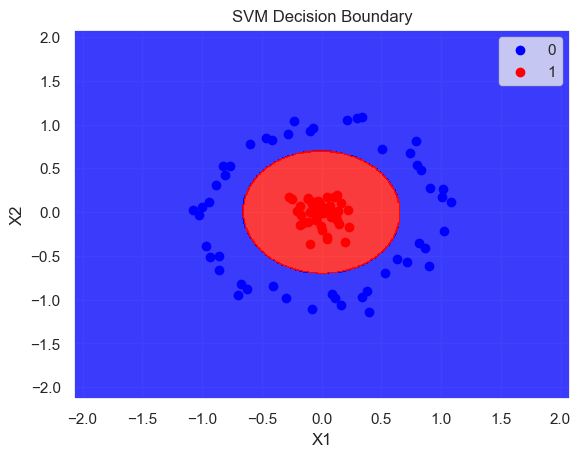

In [36]:
plot_decision_boundary(X, y, poly_classifier)

In [37]:
X

array([[ 2.98379027e-02,  4.33525607e-02],
       [ 8.93831057e-02, -9.31873335e-01],
       [-1.52202227e-01, -1.28881831e-01],
       [-8.54300650e-01, -6.57683022e-01],
       [ 7.79508394e-02, -5.38252052e-02],
       [-5.60538542e-02,  8.10161740e-02],
       [-9.54174671e-02,  9.30064360e-01],
       [-9.33627945e-01, -5.16706181e-01],
       [-4.61698097e-01,  8.40509491e-01],
       [-2.70157637e-01,  1.69431562e-01],
       [-8.55053764e-01, -4.98773850e-01],
       [-8.26272472e-01,  5.32094904e-01],
       [ 8.01809246e-02, -1.25497318e-03],
       [-7.97135620e-02,  8.96405705e-02],
       [ 2.15971929e-01,  1.05642017e+00],
       [-6.12260915e-03, -1.54619473e-01],
       [-5.21388758e-02,  9.67621890e-03],
       [-4.58568590e-02, -7.74430740e-02],
       [ 1.33355832e-01, -9.10203397e-02],
       [-6.24036385e-01, -8.82923043e-01],
       [ 4.28339294e-02, -3.04793548e-01],
       [-1.00368392e+00,  6.05997131e-02],
       [-3.23252327e-02,  1.31319941e-01],
       [ 5.

In [38]:
np.exp(-(X**2)).sum(1)

array([1.99723242, 1.41166997, 1.96062741, 1.1308455 , 1.99104913,
       1.99032077, 1.41198008, 1.18394053, 1.30141227, 1.90131571,
       1.26112615, 1.25866335, 1.99359007, 1.98566266, 1.28200704,
       1.97633885, 1.9971916 , 1.99191988, 1.97412294, 1.13605965,
       1.90945237, 1.36150838, 1.98185854, 1.36178981, 1.39677477,
       1.30088676, 1.9520134 , 1.05221219, 1.2987491 , 1.99909506,
       1.99509993, 1.99059615, 1.97136778, 1.33300642, 1.99855205,
       1.31855986, 1.9201415 , 1.37786342, 1.99735688, 1.92184025,
       1.30210901, 1.24602096, 1.86912726, 1.96164841, 1.23334507,
       1.99974807, 1.96006403, 1.31595568, 1.12876421, 1.32124572,
       1.99974729, 1.2925608 , 1.96670485, 1.91852793, 1.25339884,
       1.42353071, 1.97523168, 1.28428617, 1.96289601, 1.27994375,
       1.37140575, 1.9891642 , 1.28890502, 1.96582558, 1.34799246,
       1.95885623, 1.99017912, 1.31216883, 1.33721174, 1.12804712,
       1.29604909, 1.32003385, 1.99168637, 1.27676568, 1.98123

In [39]:
X_new=np.exp(-(X**2))

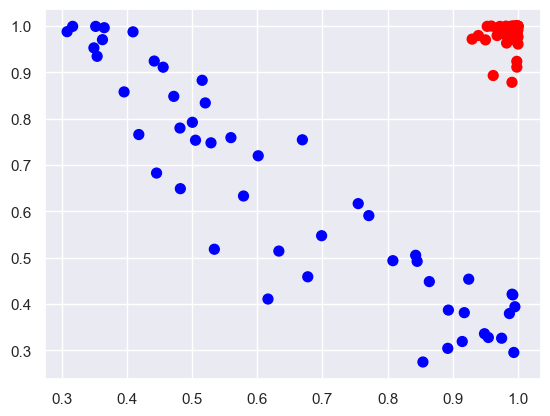

In [40]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')